In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading and Filtering

In [75]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] >= 75
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,False
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,False


In [76]:
Y = df['Passed'].values
X_df = df.drop(columns=['Passed'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X_df = X_standardized.values

In [77]:
X = X_df
X = np.column_stack((
    np.ones(len(df)),
    X
))

In [78]:
# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function

In [79]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

#### Optimization

In [80]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    beta = (1 / m) * X.T.dot(y_hat - Y)

    return beta

In [81]:
beta = np.random.randn(8)
print(f"beta values : {beta}")

lr = 0.01
n_iter = 1000

beta values : [ 2.41191929  1.01096308  0.31297666  0.3087705  -0.28010831 -0.48279896
  0.46894954  0.57956924]


#### Parameter optimization

In [82]:

cost_history = []
def logistic_gradient_descent(X, Y, lr,beta):
    for i in range(n_iter):
        """
        Z = beta.T.X = beta0 + beta1.x1
        Y_hat = sigmoid(Z)
        """
        z = X.dot(beta)
        y_hat = sigmoid(z)

        gradient = compute_gradients(X, Y, y_hat)

        beta = beta - lr * gradient

        cost = compute_cost(y_hat, Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration : {i}: Beta : {beta} :Cost : {cost:.4f}")
        
    return beta

In [83]:
beta = logistic_gradient_descent(X, Y, lr,beta)

Iteration : 0: Beta : [ 2.40513434  1.00916795  0.312901    0.3107471  -0.27970726 -0.4825384
  0.46822476  0.57935815] :Cost : 2.1445
Iteration : 100: Beta : [ 1.75530421  0.8246546   0.29992964  0.49536857 -0.23828592 -0.44792057
  0.39035319  0.54842837] :Cost : 1.6430
Iteration : 200: Beta : [ 1.1712346   0.6414255   0.27987753  0.64848441 -0.19831495 -0.39941679
  0.30820521  0.50220904] :Cost : 1.2303
Iteration : 300: Beta : [ 0.66536071  0.47530009  0.25838659  0.76381423 -0.16595753 -0.34451653
  0.2307158   0.45017923] :Cost : 0.9187
Iteration : 400: Beta : [ 0.241816    0.33555288  0.23955614  0.84436137 -0.14481778 -0.29196205
  0.1642692   0.40186971] :Cost : 0.7017
Iteration : 500: Beta : [-0.1059231   0.22314745  0.22507969  0.90152414 -0.13466071 -0.24724556
  0.11149841  0.36219334] :Cost : 0.5572
Iteration : 600: Beta : [-0.38999798  0.13422705  0.21497926  0.94700626 -0.13293781 -0.21182782
  0.07179997  0.33188491] :Cost : 0.4620
Iteration : 700: Beta : [-0.62318178 

#### Cost Visualization

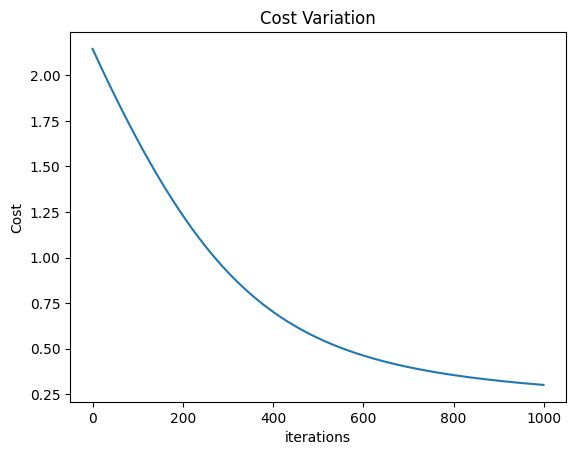

In [84]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Predict Probability

In [85]:
def predict_proba(X, beta):
    z = X.dot(beta)
    Y_proba = sigmoid(z)
    return Y_proba

In [86]:
Y_proba = predict_proba(X, beta)
Y_proba

array([0.28629859, 0.63088723, 0.46763169, 0.1187034 , 0.51176387,
       0.71078543, 0.11449564, 0.27487155, 0.09424615, 0.21468475,
       0.29043804, 0.1179611 , 0.08108802, 0.15675805, 0.37032614,
       0.06602464, 0.79581253, 0.05568862, 0.24484109, 0.52408398,
       0.27005062, 0.09278141, 0.04032397, 0.70537457, 0.75517104,
       0.10511784, 0.1151452 , 0.09041772, 0.23750018, 0.05526812,
       0.66643657, 0.12747895, 0.0661389 , 0.34716631, 0.41172066,
       0.39003276, 0.03168238, 0.08071328, 0.10038658, 0.32700388,
       0.23991755, 0.48477103, 0.18886231, 0.52493469, 0.19281911,
       0.32003603, 0.23799569, 0.09128462, 0.24409821, 0.14852254,
       0.47340175, 0.1035629 , 0.24559762, 0.56232953, 0.41374657,
       0.71598368, 0.5413519 , 0.37937469, 0.40837593, 0.52863381,
       0.04583491, 0.12840331, 0.08688072, 0.6544287 , 0.16517966,
       0.19153573, 0.36509663, 0.20599554, 0.71571012, 0.11704821,
       0.05573067, 0.32608439])

####  Binary class predictions

In [87]:
def predict_class(X, beta, threshold):
    z = X.dot(beta)
    Y_predicted = sigmoid(z)
    return Y_predicted >= threshold

In [88]:
predict_class(X,beta,0.5)

array([False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False])

#### Evaluation Matrics

##### Conusion Matrix

In [89]:
def compute_confusion_matrix(Y,Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array([
                [TN,FP]
                ,[FN,TP]
                ],
                dtype=int
                )

In [90]:
Y_hat = predict_class(X,beta,0.5)

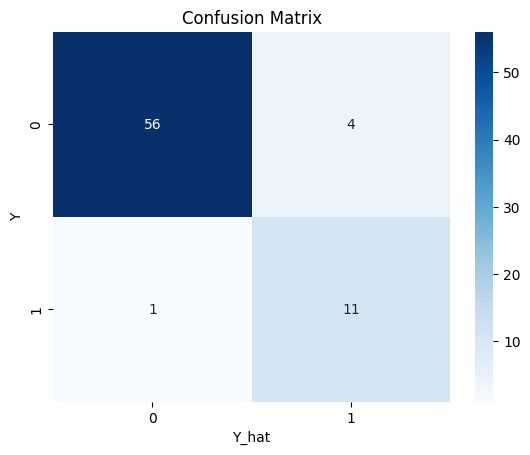

In [91]:
cm = compute_confusion_matrix(Y,Y_hat)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

##### Precisiom, Recall, f1score, accuracy

In [92]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP/(TP+FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [93]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 0.7333333333333333
Recall : 0.9166666666666666
F1 Score : 0.8148148148148148
Accuracy : 0.9305555555555556


##### ROC curve

In [94]:
def roc_curve(Y,Y_proba):
    thresholds = np.linspace(1,0,200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)

In [95]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

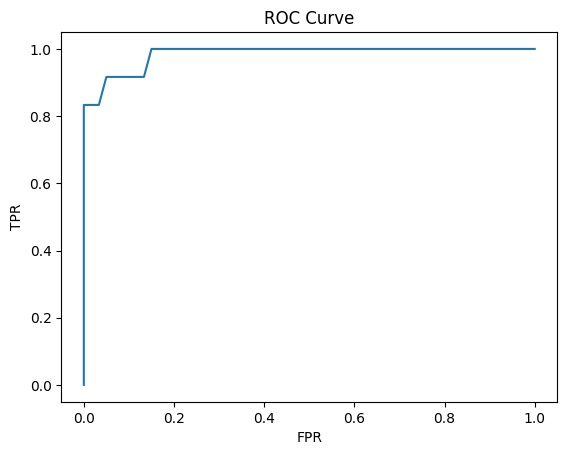

In [96]:
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [97]:
auc = np.trapezoid(tpr, fpr)
print(f"AUC: {auc}")

AUC: 0.9847222222222222
